# Gradient Boosting - Lab

## Introduction

In this lab, we'll learn how to use both Adaboost and Gradient Boosting Classifiers from scikit-learn!

## Objectives

You will be able to:

* Compare and contrast Adaboost and Gradient Boosting
* Use adaboost to make predictions on a dataset
* Use Gradient Boosting to make predictions on a dataset

## Getting Started

In this lab, we'll learn how to use Boosting algorithms to make classifications on the [Pima Indians Dataset](http://ftp.ics.uci.edu/pub/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.names). You will find the data stored within the file `pima-indians-diabetes.csv`. Our goal is to use boosting algorithms to classify each person as having or not having diabetes. Let's get started!

We'll begin by importing everything we need for this lab. In the cell below:

* Import `numpy`, `pandas`, and `matplotlib.pyplot`, and set the standard alias for each. Also set matplotlib visualizations to display inline. 
* Set a random seed of `0` by using `np.random.seed(0)`
* Import `train_test_split` and `cross_val_score` from `sklearn.model_selection`
* Import `StandardScaler` from `sklearn.preprocessing`
* Import `AdaboostClassifier` and `GradientBoostingClassifier` from `sklearn.ensemble`
* Import `accuracy_score`, `f1_score`, `confusion_matrix`, and `classification_report` from `sklearn.metrics`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

Now, use pandas to read in the data stored in `pima-indians-diabetes.csv` and store it in a DataFrame. Display the head to inspect the data we've imported and ensure everything loaded correctly. 

In [2]:
df = pd.read_csv('pima-indians-diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Cleaning, Exploration, and Preprocessing

The target we're trying to predict is the `'Outcome'` column. A `1` denotes a patient with diabetes. 

By now, you're quite familiar with exploring and preprocessing a dataset, so we won't hold your hand for this step. 

In the following cells:

* Store our target column in a separate variable and remove it from the dataset
* Check for null values and deal with them as you see fit (if any exist)
* Check the distribution of our target
* Scale the dataset
* Split the dataset into training and testing sets, with a `test_size` of `0.25`

In [3]:
target = df['Outcome']
df.drop('Outcome', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

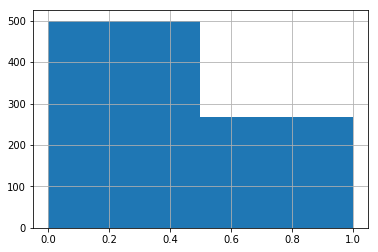

In [6]:
target.hist(bins=2);

In [7]:
scaler = StandardScaler()

In [8]:
scaled_df = scaler.fit_transform(X_train)
scaled_df.head()

NameError: name 'X_train' is not defined

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df, target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
scaler = StandardScaler()
y_test = scaler.fit_transform(y_test)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Training the Models

Now that we've cleaned and preprocessed our dataset, we're ready to fit some models!

In the cell below:

* Create an `AdaBoostClassifier`
* Create a `GradientBoostingClassifer`

In [ ]:
adaboost_clf = None
gbt_clf = None

Now, train each of the classifiers using the training data.

Now, let's create some predictions using each model so that we can calculate the training and testing accuracy for each.

In [ ]:
adaboost_train_preds = None
adaboost_test_preds = None
gbt_clf_train_preds = None
gbt_clf_test_preds = None

Now, complete the following function and use it to calculate the training and testing accuracy and f1-score for each model. 

In [ ]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = None
    f1 = None
    print("Model: {}".format(None))
    print("Accuracy: {}".format(None))
    print("F1-Score: {}".format(None))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Let's go one step further and create a confusion matrix and classification report for each. Do so in the cell below.

In [ ]:
adaboost_confusion_matrix = None
adaboost_confusion_matrix

In [ ]:
gbt_confusion_matrix = None
gbt_confusion_matrix

In [ ]:
adaboost_classification_report = None
print(adaboost_classification_report)

In [ ]:
gbt_classification_report = None
print(gbt_classification_report)

**_Question:_** How did the models perform? Interpret the evaluation metrics above to answer this question.

Write your answer below this line:
_______________________________________________________________________________________________________________________________

 
 
As a final performance check, let's calculate the `cross_val_score` for each model! Do so now in the cells below. 

Recall that to compute the cross validation score, we need to pass in:

* a classifier
* All training Data
* All labels
* The number of folds we want in our cross validation score. 

Since we're computing cross validation score, we'll want to pass in the entire (scaled) dataset, as well as all of the labels. We don't need to give it data that has been split into training and testing sets because it will handle this step during the cross validation. 

In the cells below, compute the mean cross validation score for each model. For the data, use our `scaled_df` variable. The corresponding labels are in the variable `target`. Also set `cv=5`.

In [ ]:
print('Mean Adaboost Cross-Val Score (k=5):')
print(None)
# Expected Output: 0.7631270690094218

In [ ]:
print('Mean GBT Cross-Val Score (k=5):')
print(None)
# Expected Output: 0.7591715474068416

These models didn't do poorly, but we could probably do a bit better by tuning some of the important parameters such as the **_Learning Rate_**. 

## Summary

In this lab, we learned how to use scikit-learn's implementations of popular boosting algorithms such as AdaBoost and Gradient Boosted Trees to make classification predictions on a real-world dataset!